# Model Selection and Tuning

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train_modified.csv")
holdout = pd.read_csv("holdout_modified.csv")

In [3]:
train.shape

(891, 39)

In [4]:
holdout.shape

(418, 38)

In [6]:
train.head()

,Survived,PassengerId,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,...,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Training a Logistic Regression baseline model

In [8]:
all_X = train.drop(['Survived','PassengerId'], axis=1)
all_y = train['Survived']

In [9]:
lr = LogisticRegression()

In [10]:
scores = cross_val_score(lr, all_X, all_y,cv=10)
accuracy_lr = scores.mean()
accuracy_lr

0.82389144251503799

## Training a model using K-Nearest neighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
scores = cross_val_score(knn, all_X, all_y,cv=10)
accuracy_knn = scores.mean()
accuracy_knn

0.78573828169333793

### Trying different values for k

In [16]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize = (9,6), ylim=(0.78,0.83),rot=0)
    plt.show()

In [18]:
knn_scores = {}

for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i);
    scores = cross_val_score(knn,all_X,all_y,cv=10)
    knn_scores[i] = scores.mean()

In [19]:
knn_scores

{1: 0.78573828169333793,
 3: 0.80484054023379858,
 5: 0.82271819316763128,
 7: 0.8204585177618885,
 9: 0.82158211326750652,
 11: 0.81150720690046518,
 13: 0.81712461695607763,
 15: 0.81149387129724215,
 17: 0.81494013165361479,
 19: 0.82389144251503799,
 21: 0.81709936443082509,
 23: 0.81933435478379302,
 25: 0.81596328453070011,
 27: 0.81035779139711739,
 29: 0.80024486437407794,
 31: 0.8036287027579162,
 33: 0.80472704573828169,
 35: 0.7979599364430825,
 37: 0.79351549199863813,
 39: 0.79466462376574731,
 41: 0.79242991714901834,
 43: 0.79804817841334708,
 45: 0.79689904664623756,
 47: 0.79466434002950859,
 49: 0.78460135058449665}

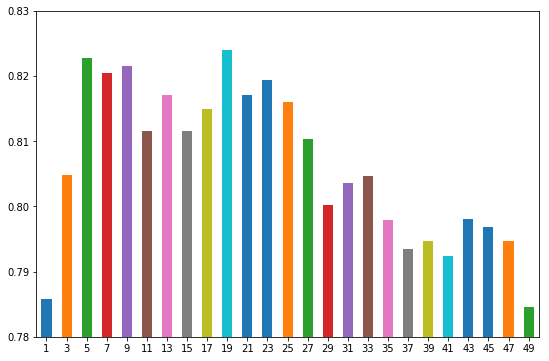

In [20]:
plot_dict(knn_scores)

### Hyperparameter Optimization using Grid Search

In [23]:
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

In [24]:
knn = KNeighborsClassifier()

In [25]:
grid = GridSearchCV(knn, param_grid = hyperparameters, cv = 10)
grid.fit(all_X, all_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
best_params = grid.best_params_
best_params

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [27]:
best_score = grid.best_score_
best_score 

0.82828282828282829

### Submitting K-Nearest Neighbors predictions to Kaggle

In [28]:
best_knn = grid.best_estimator_

In [30]:
best_knn = KNeighborsClassifier(p=1, algorithm='brute', n_neighbors=5, weights='uniform')

In [31]:
best_knn.fit(all_X, all_y)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

In [33]:
predictions = best_knn.predict(holdout.drop(['PassengerId'],axis = 1))

In [34]:
submission = pd.DataFrame({"PassengerId": holdout['PassengerId'], "Survived": predictions})
submission.to_csv("submission_1.csv", index = False)

## Training a model using Random Forrests

In [36]:
rf = RandomForestClassifier(random_state = 1)

In [38]:
scores = cross_val_score(rf,all_X,all_y,cv=10)
scores

array([ 0.85555556,  0.75555556,  0.71910112,  0.85393258,  0.83146067,
        0.80898876,  0.80898876,  0.74157303,  0.84269663,  0.85227273])

In [39]:
accuracy_rf = scores.mean()
accuracy_rf 

0.80701254114175458

### Hyperparameter Optimization using Grid Search

In [40]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

In [41]:
rf = RandomForestClassifier(random_state = 1)
grid = GridSearchCV(rf,param_grid = hyperparameters, cv = 10)
grid.fit(all_X, all_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [5, 10], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 5], 'min_samples_split': [3, 5], 'n_estimators': [6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
best_params = grid.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 9}

In [43]:
best_score = grid.best_score_
best_score

0.84287317620650959

### Submitting Random Forests predictions to Kaggle

In [44]:
best_rf = grid.best_estimator_
predictions = best_rf.predict(holdout.drop(['PassengerId'],axis = 1))

In [45]:
submission = pd.DataFrame({"PassengerId": holdout["PassengerId"], "Survived": predictions})
submission.to_csv("submission_2.csv",index=False)